In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

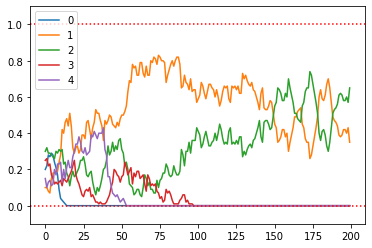

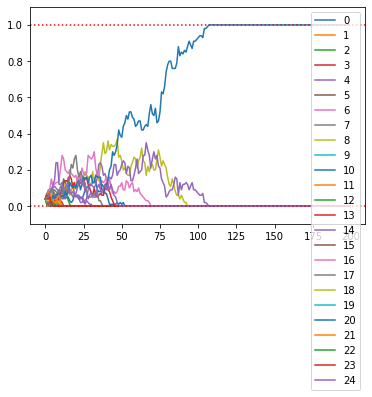

In [ ]:
# Implementação de simulação de deriva genética.
# Argumentos: um inteiro n que especifica o número de indivíduos, um inteiro m que especifica o número de alelos
# e um inteiro t que especifica o número de gerações.
# Argumentos opcionais: uma lista initial_freq que especifica as frequências iniciais dos m alelos e uma booleana plot
# que determina se é necessário plotar as frequências ou não.
def drift_simulator(n, m, t, initial_freq=None, plot=False):

  # proporção uniforme se ela não for fornecida
  if initial_freq is None:
    initial_freq = [1/m] * m

  # Modelo da população: array de inteiros tal que cada índice é uma cópia gênica e cada alelo é um inteiro
  # Cria uma array que é só os alelos nas proporções especificadas por initial_freq, e então permuta ela
  population = np.hstack([[i] * round(initial_freq[i] * n) for i in range(m)])
  seed = np.random.default_rng()
  seed.shuffle(population)

  # Guarda as frequências alélicas ao longo do tempo.
  freq = np.empty((t, m))
  freq[0] = initial_freq

  # Simula a passagem de gerações
  for generation in range(1, t):
    # Eu não confio que population = f(population) vai funcionar direito :(
    new_population = np.random.choice(population, n)
    population = new_population
    # Mede as frequências alélicas da nova geração
    freq[generation] = [count/n for count in np.bincount(population, minlength=m)]

  # plotagem
  if plot:
    for label, frequency in enumerate(freq.T):
      plt.plot(range(t), frequency, label=label)
    # fixa os limites inferior e superior (para vermos a relação com 1 e 0 direito)
    plt.ylim(-0.1, 1.1)

    # plota uma linha referência no 1 e no 0
    plt.axhline(y=1, color='r', linestyle=':')
    plt.axhline(y=0, color='r', linestyle=':')

    # mostra a legenda e o plot
    plt.legend()
    plt.show()

  # retorna as frequências
  return freq


a = drift_simulator(100, 5, 200, initial_freq=[0.2, 0.1, 0.3, 0.25, 0.15], plot=True)
b = drift_simulator(100, 25, 200, plot=True)

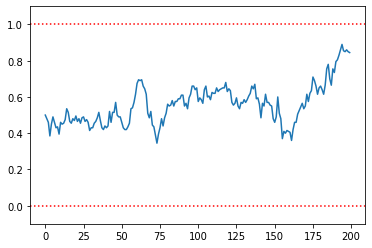

In [ ]:
# Implementação de simulação de deriva genética com seleção.
# Argumentos: um inteiro n que especifica o número de indivíduos e um inteiro t que especifica o número de gerações.
# Opcionais: uma lista de tamanho 3 w que especifica o valor adaptativo dos três genótipos AA, Aa, aa,
# um inteiro initial_A_freq que especifica a frequência inicial do alelo A, uma booleana plot que decide se é pra plotar ou não
def drift_and_selection_simulator(n, t, w=[1, 1, 0.95], initial_A_freq=0.5, plot=False):

  # frequência dos alelos é inicializada com o valor inicial
  A_freq = initial_A_freq
  a_freq = 1 - A_freq

  # guarda a frequência alélica ao longo do tempo
  freq = np.empty(t)
  freq[0] = initial_A_freq

  # simula a passagem de gerações
  for generation in range(1, t):

    # produz as frequências genotípicas pós-seleção
    normalizer = ((A_freq ** 2) * w[0]) + ((2 * A_freq * a_freq) * w[1]) + ((a_freq ** 2) * w[2])
    geno_freq = [((A_freq ** 2) * w[0])/normalizer,
                 ((2 * A_freq * a_freq) * w[1])/normalizer,
                 ((a_freq ** 2) * w[2])/normalizer]

    # Modelo da população: array de pares de inteiros tal que cada índice é um indivíduo diplóide
    # A = 1, a = 0
    # numpy lida de jeito estranho com listas de tuples, então só usamos listas normais. se você souber
    # como lidar com isso de um jeito mais legal, deixe um comentário (e clique no sininho, etc)!
    population = ([(1, 1)] * round(geno_freq[0] * n) +
                  [(1, 0)] * round(geno_freq[1] * n) +
                  [(0, 0)] * round(geno_freq[2] * n))

    # implementação explícita dos sorteios
    new_population = []
    for i in range(n):
      parent_1, parent_2 = random.sample(population, 2)
      offspring = (np.random.choice(parent_1), np.random.choice(parent_2))
      new_population.append(offspring)

    # calcula a nova frequência de A. sem numpy, adeus vetorização
    A_freq = sum([sum(individual) for individual in new_population])/(2 * n)
    a_freq = 1 - A_freq
    freq[generation] = A_freq

  # plotagem
  if plot:
    # plota a frequência
    plt.plot(range(t), freq)

    # fixa os limites inferior e superior (para vermos a relação com 1 e 0 direito)
    plt.ylim(-0.1, 1.1)

    # plota uma linha referência no 1 e no 0
    plt.axhline(y=1, color='r', linestyle=':')
    plt.axhline(y=0, color='r', linestyle=':')

    plt.show()

  # retorna a lista de frequências de A
  return freq

s = 0.01
a = drift_and_selection_simulator(100, 200, w=[1, 1, 1-s], plot=True)
